In [3]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r'F:\实习报告\项目数据')
order = pd.read_csv('附件1.csv', engine = 'python', encoding = 'gbk')
print('附件一的数据的形状为：', '\n', order.shape)

附件一的数据的形状为： 
 (70680, 9)


In [3]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r'F:\实习报告\项目数据')
order = pd.read_csv('附件1.csv', engine = 'python', encoding = 'gbk')
print('附件一的数据的形状为：', '\n', order.shape)

附件一的数据的形状为： 
 (70680, 9)


In [5]:
print('附件一的数据的类型为：', '\n', order.dtypes)

附件一的数据的为： 
 订单号      object
设备ID     object
应付金额    float64
实际金额    float64
商品       object
支付时间     object
地点       object
状态       object
提现       object
dtype: object


In [6]:
order['支付时间'] = pd.to_datetime(order['支付时间'], errors = 'coerce', format = '%Y-%m-%d')

print('缺失值数量:\n', order.isnull().sum())
print('去除缺失值之前： ',order.shape)
order = order.dropna()
print('去除缺失值之后： ',order.shape)

缺失值数量:
 订单号     0
设备ID    0
应付金额    0
实际金额    0
商品      0
支付时间    1
地点      0
状态      0
提现      0
dtype: int64
去除缺失值之前：  (70680, 9)
去除缺失值之后：  (70679, 9)


In [7]:
print('去重前附件一的形状为：',order.shape)
order.drop_duplicates(inplace = True)
print('附件一样本去重后的形状为：',order.shape)

去重前附件一的形状为： (70679, 9)
附件一样本去重后的形状为： (70679, 9)


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
def outRange(Ser1):
    QL = Ser1.quantile(0.25)
    QU = Ser1.quantile(0.75)
    IQR = QU-QL
    Ser1.loc[Ser1>(QU+1.5*IQR)] = QU
    Ser1.loc[Ser1<(QL-1.5*IQR)] = QL
    return Ser1
os.chdir(r'F:\实习报告\项目数据')
order['应付金额'] = outRange(order['应付金额'])
order['实际金额'] = outRange(order['实际金额'])

print('数据预处理后附件一的形状:', order.shape)
appendix1 = order.to_csv('处理后的数据.csv', sep = ';', index = True)

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


数据预处理后附件一的形状: (70679, 9)


In [15]:
os.chdir(r'F:\实习报告\task1')
order1 = order.iloc[(order['地点']=='A').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order1.to_csv('task1-1A.csv', sep = ';', index = False)

order2 = order.iloc[(order['地点']=='B').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order2.to_csv('task1-1B.csv', sep = ';', index = False)

order3 = order.iloc[(order['地点']=='C').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order3.to_csv('task1-1C.csv', sep = ';', index = False)

order4 = order.iloc[(order['地点']=='D').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order4.to_csv('task1-1D.csv', sep = ';', index = False)

order5 = order.iloc[(order['地点']=='E').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order5.to_csv('task1-1E.csv', sep = ';', index = False)

order1['month'] = [i.month for i in order1['支付时间']]
detailGroup1 = order1[['month','订单号','实际金额']].groupby(by='month')#数据分组

order2['month'] = [i.month for i in order2['支付时间']]
detailGroup2 = order2[['month','订单号','实际金额']].groupby(by='month')

order3['month'] = [i.month for i in order3['支付时间']]
detailGroup3 = order3[['month','订单号','实际金额']].groupby(by='month')

order4['month'] = [i.month for i in order4['支付时间']]
detailGroup4 = order4[['month','订单号','实际金额']].groupby(by='month')

order5['month'] = [i.month for i in order5['支付时间']]
detailGroup5 = order5[['month','订单号','实际金额']].groupby(by='month')


Group1 = detailGroup1.agg({'订单号':np.size,'实际金额':np.sum})
Group2 = detailGroup2.agg({'订单号':np.size,'实际金额':np.sum})
Group3 = detailGroup3.agg({'订单号':np.size,'实际金额':np.sum})
Group4 = detailGroup4.agg({'订单号':np.size,'实际金额':np.sum})
Group5 = detailGroup5.agg({'订单号':np.size,'实际金额':np.sum})

print('A处售货机的月订单号总数和实际金额总数为：\n', Group1)
print('B处售货机的月订单号总数和实际金额总数为：\n', Group2)
print('C处售货机的月订单号总数和实际金额总数为：\n', Group3)
print('D处售货机的月订单号总数和实际金额总数为：\n', Group4)
print('E处售货机的月订单号总数和实际金额总数为：\n', Group5)


print('A处售货机每月的每单平均交易额：\n', detailGroup1.agg({'实际金额':np.mean}))
print('B处售货机每月的每单平均交易额：\n', detailGroup2.agg({'实际金额':np.mean}))
print('C处售货机每月的每单平均交易额：\n', detailGroup3.agg({'实际金额':np.mean}))
print('D处售货机每月的每单平均交易额：\n', detailGroup4.agg({'实际金额':np.mean}))
print('E处售货机每月的每单平均交易额：\n', detailGroup5.agg({'实际金额':np.mean}))

A处售货机的月订单号总数和实际金额总数为：
         订单号    实际金额
month              
1       335  1206.2
2       114   374.0
3       255   810.2
4       447  1618.2
5       756  2816.8
6      1669  5850.4
7       476  1702.3
8       666  2078.1
9      1040  3811.0
10     1565  5458.7
11     1160  4335.8
12     2003  6808.1
B处售货机的月订单号总数和实际金额总数为：
         订单号    实际金额
month              
1       366  1250.5
2       185   580.8
3       265   886.8
4       603  2111.8
5       869  3223.8
6      1856  6589.0
7       345  1248.2
8       981  3335.2
9      1745  6088.9
10     2026  7291.7
11     2031  7094.8
12     2210  7484.6
C处售货机的月订单号总数和实际金额总数为：
         订单号    实际金额
month              
1       379  1382.2
2       207   738.5
3       263   927.5
4       734  2755.5
5       789  2993.8
6      1882  6738.6
7       764  2699.4
8      1259  4560.0
9      1678  6110.9
10     2216  8182.7
11     1943  7085.4
12     2379  8485.6
D处售货机的月订单号总数和实际金额总数为：
         订单号    实际金额
month              
1       259   887.8
2       

In [17]:
daily1 = order1.set_index('支付时间').groupby(pd.Grouper(freq='D'))['订单号'].count()
monthly1 = daily1.groupby(pd.Grouper(freq='M')).mean()

daily2 = order2.set_index('支付时间').groupby(pd.Grouper(freq='D'))['订单号'].count()
monthly2 = daily2.groupby(pd.Grouper(freq='M')).mean()

daily3 = order3.set_index('支付时间').groupby(pd.Grouper(freq='D'))['订单号'].count()
monthly3 = daily3.groupby(pd.Grouper(freq='M')).mean()

daily4 = order4.set_index('支付时间').groupby(pd.Grouper(freq='D'))['订单号'].count()
monthly4 = daily4.groupby(pd.Grouper(freq='M')).mean()

daily5 = order5.set_index('支付时间').groupby(pd.Grouper(freq='D'))['订单号'].count()
monthly5 = daily5.groupby(pd.Grouper(freq='M')).mean()


print('A处售货机每月的日均订单量为：\n', monthly1)
print('B处售货机每月的日均订单量为：\n', monthly2)
print('C处售货机每月的日均订单量为：\n', monthly3)
print('D处售货机每月的日均订单量为：\n', monthly4)
print('E处售货机每月的日均订单量为：\n', monthly5)

A处售货机每月的日均订单量为：
 支付时间
2017-01-31    10.806452
2017-02-28     4.071429
2017-03-31     8.225806
2017-04-30    14.900000
2017-05-31    24.387097
2017-06-30    55.633333
2017-07-31    15.354839
2017-08-31    21.483871
2017-09-30    34.666667
2017-10-31    50.483871
2017-11-30    38.666667
2017-12-31    64.612903
Freq: M, Name: 订单号, dtype: float64
B处售货机每月的日均订单量为：
 支付时间
2017-01-31    11.806452
2017-02-28     6.607143
2017-03-31     8.548387
2017-04-30    20.100000
2017-05-31    28.032258
2017-06-30    61.866667
2017-07-31    11.129032
2017-08-31    31.645161
2017-09-30    58.166667
2017-10-31    65.354839
2017-11-30    67.700000
2017-12-31    71.290323
Freq: M, Name: 订单号, dtype: float64
C处售货机每月的日均订单量为：
 支付时间
2017-01-31    12.225806
2017-02-28     7.392857
2017-03-31     8.483871
2017-04-30    24.466667
2017-05-31    25.451613
2017-06-30    62.733333
2017-07-31    24.645161
2017-08-31    40.612903
2017-09-30    55.933333
2017-10-31    71.483871
2017-11-30    64.766667
2017-12-31    76.741935


In [20]:
os.chdir(r'F:\实习报告')
merge1 = order1.append(order2)
merge2 = merge1.append(order3)
merge3 = merge2.append(order4)
merge = merge3.append(order5)
merge.to_csv('项目数据/数据处理、排序后的合并.csv', sep = ';', index = False)
merge['month'] = merge['month'].astype('object')
print(merge.dtypes)

订单号              object
设备ID             object
应付金额            float64
实际金额            float64
商品               object
支付时间     datetime64[ns]
地点               object
状态               object
提现               object
month            object
dtype: object


In [21]:
merge_201706 = merge.iloc[(merge['month']== 6).values,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
print('2017年6月销量前5的商品及其销量为：\n', merge_201706['商品'].value_counts()[:5])

2017年6月销量前5的商品及其销量为：
 怡宝纯净水         657
40g双汇玉米热狗肠    240
东鹏特饮          238
脉动            235
250ml维他柠檬茶    225
Name: 商品, dtype: int64


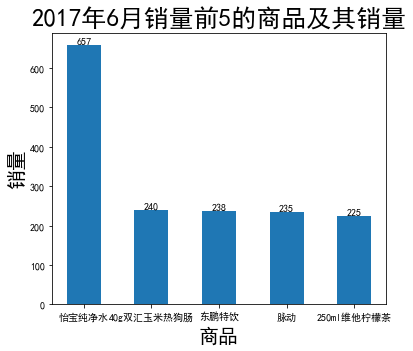

In [121]:
plt.figure(figsize=(6,5))
plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False
label = ['怡宝纯净水','40g双汇玉米热狗肠','东鹏特饮', '脉动', '250ml维他柠檬茶']
heightlable = [657, 240, 238, 235, 225]
plt.bar(range(5), heightlable, width = 0.5)
plt.xlabel('商品', fontsize=20)
plt.ylabel('销量', fontsize=20)
plt.xticks(range(5), label)
plt.title('2017年6月销量前5的商品及其销量', fontsize=25)
for i in range(len(heightlable )):
    plt.text(i, heightlable[i], heightlable[i], va='bottom', ha='center')

In [30]:
Group1['Mom-rate'] = 'null'
Group2['Mom-rate'] = 'null'
Group3['Mom-rate'] = 'null'
Group4['Mom-rate'] = 'null'
Group5['Mom-rate'] = 'null'

In [31]:
Group1

,订单号,实际金额,Mom-rate
month,,,
1,335,1206.2,null
2,114,374.0,null
3,255,810.2,null
4,447,1618.2,null
5,756,2816.8,null
6,1669,5850.4,null
7,476,1702.3,null
8,666,2078.1,null
9,1040,3811.0,null


In [32]:
Group1.to_excel('task2/task2-1A.xlsx',sheet_name='Sheet1',index=False)
Group2.to_excel('task2/task2-1B.xlsx',sheet_name='Sheet2',index=False)
Group3.to_excel('task2/task2-1C.xlsx',sheet_name='Sheet3',index=False)
Group4.to_excel('task2/task2-1D.xlsx',sheet_name='Sheet4',index=False)
Group5.to_excel('task2/task2-1E.xlsx',sheet_name='Sheet5',index=False)

In [33]:
path =r"F:\\实习报告\task2"
dirs = os.listdir(path)
a = []
for file in dirs:
    a.append(file)
print(a)

['task2-1A.xlsx', 'task2-1B.xlsx', 'task2-1C.xlsx', 'task2-1D.xlsx', 'task2-1E.xlsx']


In [35]:
os.chdir(r'F:\实习报告\task2')
for file in a:
    month = pd.read_excel(file)
    for i in range(0,len(month)):
        if i == 0:
            month['Mom-rate'[i]] = 'null'
        else:
            month['Mom-rate'][i] = format((month['实际金额'][i] - month['实际金额'][i-1]) / month['实际金额'][i-1],'.2%')
    print(month)
    month.to_excel(file,index=False)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     订单号    实际金额 Mom-rate     M
0    335  1206.2      NaN  null
1    114   374.0  -68.99%  null
2    255   810.2  116.63%  null
3    447  1618.2   99.73%  null
4    756  2816.8   74.07%  null
5   1669  5850.4  107.70%  null
6    476  1702.3  -70.90%  null
7    666  2078.1   22.08%  null
8   1040  3811.0   83.39%  null
9   1565  5458.7   43.24%  null
10  1160  4335.8  -20.57%  null
11  2003  6808.1   57.02%  null
     订单号    实际金额 Mom-rate     M
0    366  1250.5      NaN  null
1    185   580.8  -53.55%  null
2    265   886.8   52.69%  null
3    603  2111.8  138.14%  null
4    869  3223.8   52.66%  null
5   1856  6589.0  104.39%  null
6    345  1248.2  -81.06%  null
7    981  3335.2  167.20%  null
8   1745  6088.9   82.56%  null
9   2026  7291.7   19.75%  null
10  2031  7094.8   -2.70%  null
11  2210  7484.6    5.49%  null
     订单号    实际金额 Mom-rate     M
0    379  1382.2      NaN  null
1    207   738.5  -46.57%  null
2    263   927.5   25.59%  null
3    734  2755.5  197.09%  null
4    789

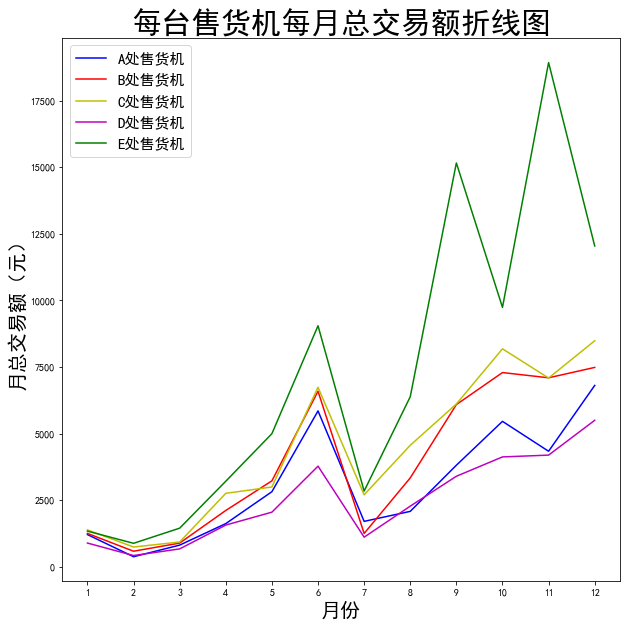

In [36]:
A_month = pd.read_excel('task2-1A.xlsx')
B_month = pd.read_excel('task2-1B.xlsx')
C_month = pd.read_excel('task2-1C.xlsx')
D_month = pd.read_excel('task2-1D.xlsx')
E_month = pd.read_excel('task2-1E.xlsx')

values1 = A_month['实际金额']
values2 = B_month['实际金额']
values3 = C_month['实际金额']
values4 = D_month['实际金额']
values5 = E_month['实际金额']
label1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.figure(figsize=(10,10))
plt.xlabel('月份', fontsize=20)
plt.ylabel('月总交易额（元）', fontsize=20)
plt.xticks(label1)
plt.title('每台售货机每月总交易额折线图', fontsize=30)
plt.plot(label1,values1,'b-',
        label1,values2,'r-',
        label1,values3,'y-',
        label1,values4,'m-',
        label1,values5,'g-')

plt.legend(['A处售货机', 'B处售货机', 'C处售货机', 'D处售货机', 'E处售货机'], fontsize=15)
plt.savefig('每台售货机每月总交易额折线图.png')
plt.show()

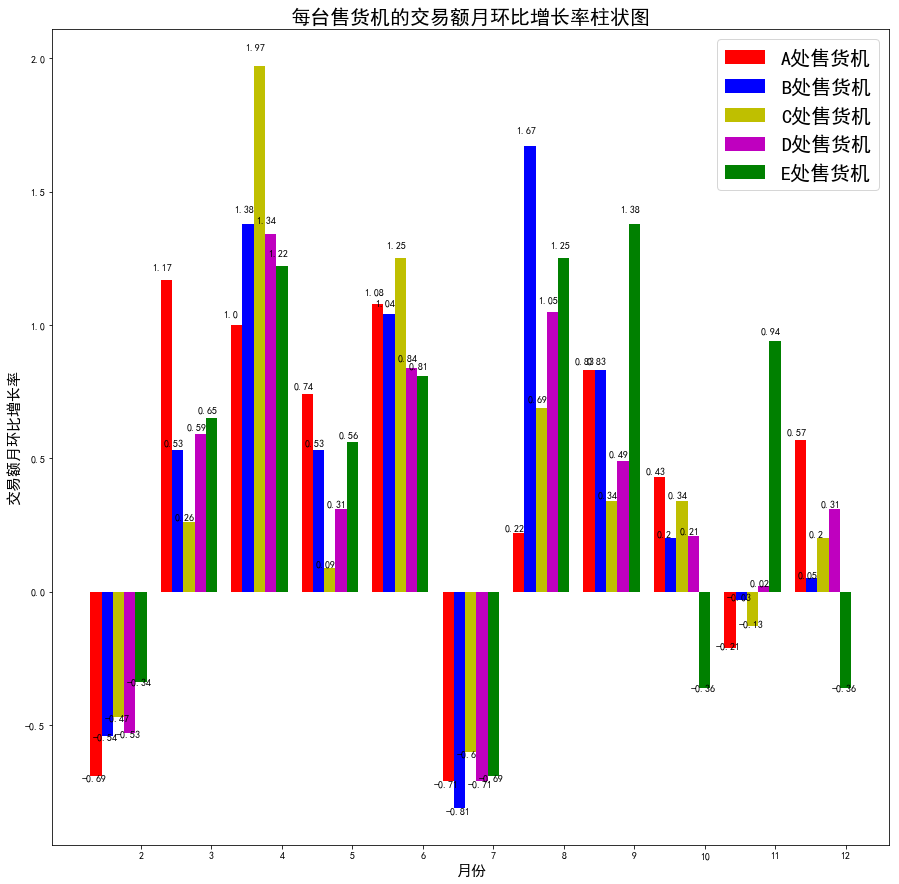

In [123]:

plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False
name = [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


A_height_ = round(A_month['Mom-rate'].str.strip("%").astype(float)/100, 2)
B_height_ = round(B_month['Mom-rate'].str.strip("%").astype(float)/100, 2) 
C_height_ = round(C_month['Mom-rate'].str.strip("%").astype(float)/100, 2) 
D_height_ = round(D_month['Mom-rate'].str.strip("%").astype(float)/100, 2) 
E_height_ = round(E_month['Mom-rate'].str.strip("%").astype(float)/100, 2) 


A_height = A_height_[1:]
B_height = B_height_[1:]
C_height = C_height_[1:]
D_height = D_height_[1:]
E_height = E_height_[1:]
plt.xlabel('月份', fontsize=15 )
plt.ylabel('交易额月环比增长率', fontsize=15)
plt.xticks(range(11), label)
plt.title('每台售货机的交易额月环比增长率柱状图', fontsize=20)


def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))

total_width, n = 0.8, 5 
width = total_width / n 
x=[0,1,2,3,4,5,6,7,8,9,10]
     
A=plt.bar(x, A_height, width=width, label='A处售货机',tick_label = name,fc = 'r')  
for i in range(len(x)):  
    x[i] = x[i] + width  
B=plt.bar(x, B_height, width=width, label='B处售货机',tick_label = name,fc = 'b')
for i in range(len(x)):  
    x[i] = x[i] + width  
C=plt.bar(x, C_height, width=width, label='B处售货机',tick_label = name,fc = 'y')
for i in range(len(x)):  
    x[i] = x[i] + width  
D=plt.bar(x, D_height, width=width, label='D处售货机',tick_label = name,fc = 'm')
for i in range(len(x)):  
    x[i] = x[i] + width  
E=plt.bar(x, E_height, width=width, label='E处售货机',tick_label = name,fc = 'g')

plt.legend(['A处售货机', 'B处售货机', 'C处售货机', 'D处售货机', 'E处售货机'], fontsize=20)
autolabel(A)
autolabel(B)
autolabel(C)
autolabel(D)
autolabel(E)
plt.savefig('每台售货机的交易额月环比增长率柱状图.png')
plt.show()


In [49]:
os.chdir(r'F:\实习报告\项目数据')

app0 = pd.read_csv('附件1.csv', sep=',', engine = 'python', encoding='gbk') 

app0.drop(labels = 70679, axis = 0, inplace = True)
app1 = app0

app2 = pd.read_csv('附件2.csv', sep=',',engine = 'python', encoding='gbk') 

app_merge = pd.merge(app1, app2, left_on='商品', right_on = '商品')

app_merge['支付时间'] = pd.to_datetime(app_merge['支付时间'])

In [51]:
app_merge1 = app_merge.iloc[(app_merge['大类']=='饮料').values, [3, 4, 5, 6, 9, 10]]
app_merge2 = app_merge.iloc[(app_merge['大类']=='非饮料').values,[3, 4, 5, 6, 9, 10]]


app_merge1A = app_merge1.iloc[(app_merge1['地点']=='A').values, [0,1,2,3,4,5]]
app_merge2A = app_merge2.iloc[(app_merge2['地点']=='A').values, [0,1,2,3,4,5]]

app_merge1B = app_merge1.iloc[(app_merge1['地点']=='B').values, [0,1,2,3,4,5]]
app_merge2B = app_merge2.iloc[(app_merge2['地点']=='B').values, [0,1,2,3,4,5]]

app_merge1C = app_merge1.iloc[(app_merge1['地点']=='C').values, [0,1,2,3,4,5]]
app_merge2C = app_merge2.iloc[(app_merge2['地点']=='C').values, [0,1,2,3,4,5]]

app_merge1D = app_merge1.iloc[(app_merge1['地点']=='D').values, [0,1,2,3,4,5]]
app_merge2D = app_merge2.iloc[(app_merge2['地点']=='D').values, [0,1,2,3,4,5]]

app_merge1E = app_merge1.iloc[(app_merge1['地点']=='E').values, [0,1,2,3,4,5]]
app_merge2E = app_merge2.iloc[(app_merge2['地点']=='E').values, [0,1,2,3,4,5]]


print('A处售货机毛利润为：', app_merge1A.agg({'实际金额':np.sum}) * 0.25 + app_merge2A.agg({'实际金额':np.sum}) * 0.2)
print('B处售货机毛利润为：', app_merge1B.agg({'实际金额':np.sum}) * 0.25 + app_merge2B.agg({'实际金额':np.sum}) * 0.2)
print('C处售货机毛利润为：', app_merge1C.agg({'实际金额':np.sum}) * 0.25 + app_merge2C.agg({'实际金额':np.sum}) * 0.2)
print('D处售货机毛利润为：', app_merge1D.agg({'实际金额':np.sum}) * 0.25 + app_merge2D.agg({'实际金额':np.sum}) * 0.2)
print('E处售货机毛利润为：', app_merge1E.agg({'实际金额':np.sum}) * 0.25 + app_merge2E.agg({'实际金额':np.sum}) * 0.2)


A处售货机毛利润为： 实际金额    9707.585
dtype: float64
B处售货机毛利润为： 实际金额    12543.82
dtype: float64
C处售货机毛利润为： 实际金额    14291.365
dtype: float64
D处售货机毛利润为： 实际金额    7703.34
dtype: float64
E处售货机毛利润为： 实际金额    22341.23
dtype: float64


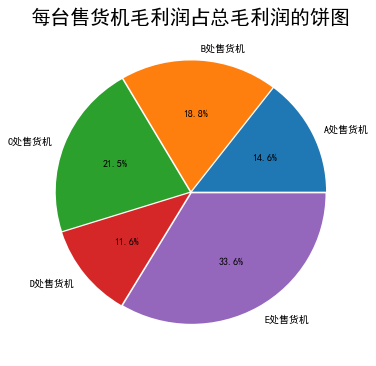

In [53]:
plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,6))
label= ['A处售货机','B处售货机','C处售货机','D处售货机','E处售货机']
explode = [0.01, 0.01, 0.01, 0.01, 0.01]
plt.pie([9707.585, 12543.82, 14291.365, 7703.34, 22341.23], explode=explode, labels=label, autopct='%1.1f%%')## 绘制饼图
plt.title('每台售货机毛利润占总毛利润的饼图', fontsize=20)
plt.savefig('每台售货机毛利润占总毛利润的饼图.png')
plt.show()

In [54]:
app_merge['month'] = [i.month for i in app_merge['支付时间']]
app_merge[['month','订单号','实际金额']].groupby(by='month')

In [55]:
retail_cl = app_merge.groupby('二级类').sum()
print(retail_cl.head())

         应付金额     实际金额  month
二级类                          
乳制品   39886.3  39886.3  73823
其他      511.7    511.7   1523
功能饮料  36796.4  36796.4  68125
咖啡     5922.5   5922.5   7716
坚果炒货    836.1    836.1    953


In [56]:
list_month = np.arange(1, 13).tolist()
print(list_month)
task_2_4 = pd.DataFrame(np.zeros((20, 12)), index = retail_cl.index, columns = list_month)
print(task_2_4)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           1    2    3    4    5    6    7    8    9    10   11   12
二级类                                                                 
乳制品       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
其他        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
功能饮料      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
咖啡        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
坚果炒货      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
方便速食      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
果冻/龟苓膏    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
果蔬饮料      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
植物蛋白      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
水         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
海味零食      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
碳酸饮料      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [125]:
for i in list_month:
    for j in task_2_4.index:
        temp_sh = app_merge.loc[((app_merge['二级类'] == j) & 
                                  (app_merge['month'] == i)), :]
        task_2_4[i][j] = temp_sh['实际金额'].sum()

In [126]:
task_2_4

,1,2,3,4,5,6,7,8,9,10,11,12
二级类,,,,,,,,,,,,
乳制品,1148.0,343.0,594.8,1857.3,2651.6,5405.5,1574.4,2179.4,5892.6,5554.3,7278.7,5406.7
其他,0.0,0.0,0.1,0.3,0.0,3.4,26.0,32.0,150.4,62.1,215.7,21.7
功能饮料,718.5,663.5,955.0,1558.3,1658.3,3653.7,1181.0,3672.1,4983.8,4403.9,6322.5,7025.8
咖啡,169.5,23.5,33.5,296.5,610.5,515.0,230.0,154.0,1064.0,675.0,1253.0,898.0
坚果炒货,50.0,0.0,21.0,30.8,79.8,146.8,61.5,0.0,108.5,79.6,164.5,93.6
方便速食,457.0,122.9,345.6,824.5,2022.5,3009.5,890.7,773.2,2482.1,2470.5,3547.3,2720.5
果冻/龟苓膏,5.0,0.0,5.0,27.0,32.0,17.0,22.0,0.0,108.0,30.0,66.0,55.0
果蔬饮料,217.0,180.5,140.0,393.0,553.5,891.0,296.5,849.0,1583.0,1292.5,1953.5,1462.5
植物蛋白,263.2,63.6,197.0,438.6,608.6,1497.0,381.4,270.5,1196.7,1288.2,1216.0,1348.6


In [127]:
mp_s = pd.Series(np.arange(len(task_2_4)), index = task_2_4.index)
print(mp_s)

二级类
乳制品          0
其他           1
功能饮料         2
咖啡           3
坚果炒货         4
方便速食         5
果冻/龟苓膏       6
果蔬饮料         7
植物蛋白         8
水            9
海味零食        10
碳酸饮料        11
糖果/巧克力      12
纸巾          13
肉干/豆制品/蛋    14
膨化食品        15
茶饮料         16
蜜饯/果干       17
饼干糕点        18
香烟          19
dtype: int32


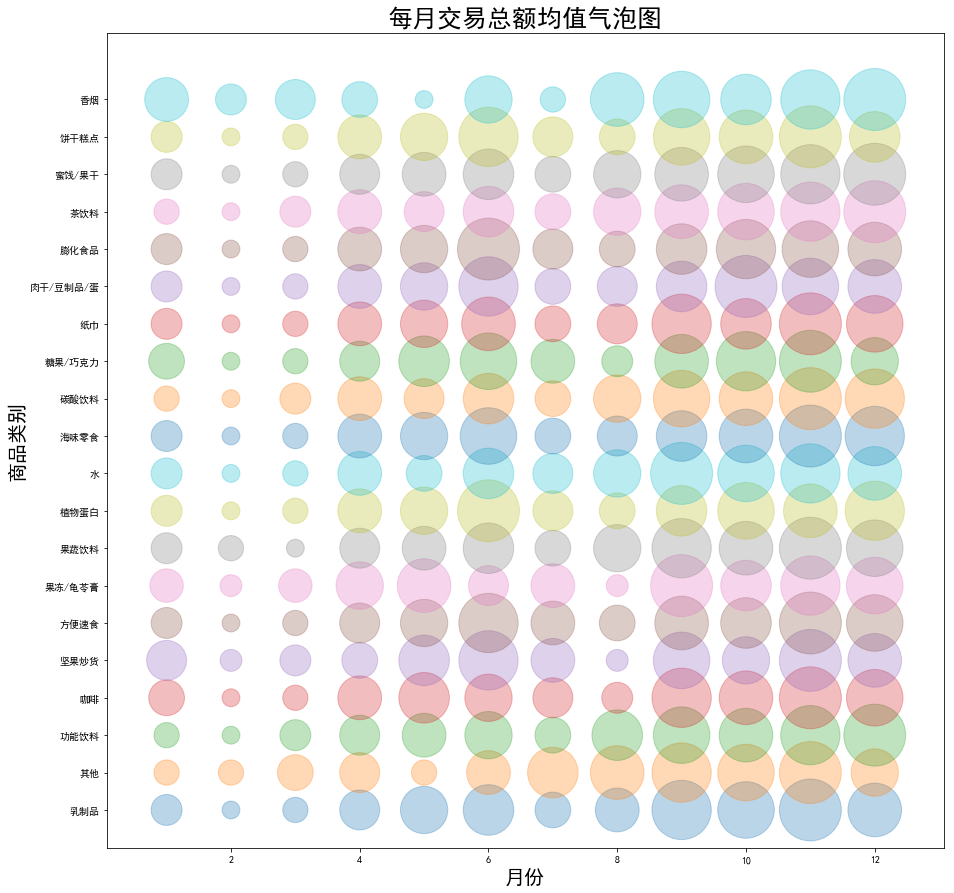

In [128]:
import random

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(15, 15)) 
plt.title('每月交易总额均值气泡图', fontsize=25)
plt.xlabel('月份', fontsize=20)
plt.ylabel('商品类别', fontsize=20)

for i in task_2_4.index:
    x = list(list_month)
    y = list(np.ones(12) * mp_s[i])
    cm = plt.cm.get_cmap('RdYlBu')
    size = task_2_4.loc[i].rank() 
    plt.scatter(x, y, s = 320 * size, cmap = cm, alpha = 0.3)
    plt.yticks(range(len(task_2_4)), list(task_2_4.index))
    
plt.savefig('每月交易总额均值气泡图.png')
plt.show()

In [60]:
app_merge.dtypes

订单号              object
设备ID             object
应付金额            float64
实际金额            float64
商品               object
支付时间     datetime64[ns]
地点               object
状态               object
提现               object
大类               object
二级类              object
month             int64
dtype: object

In [61]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm 
from matplotlib import axes


#添加'日期'列
app_merge['日期'] = app_merge['支付时间'].dt.day

#添加'小时'列
app_merge['小时'] = app_merge['支付时间'].dt.hour

print(app_merge.head())

                               订单号             设备ID  应付金额  实际金额            商品  \
0    DD201708167493663618499909784  E43A6E078A07631   4.5   4.5  68g好丽友巧克力派2枚   
1     DD20170816749368329675770932  E43A6E078A07631   4.5   4.5  68g好丽友巧克力派2枚   
2  DD20170816749300229112037656709  E43A6E078A06874   4.5   4.5  68g好丽友巧克力派2枚   
3    DD201708167493529849068514902  E43A6E078A04228   4.0   4.0  68g好丽友巧克力派2枚   
4    DD201708167493876353091909391  E43A6E078A04228  14.0  14.0  68g好丽友巧克力派2枚   

                 支付时间 地点      状态   提现   大类   二级类  month  日期  小时  
0 2017-01-01 00:53:00  D  已出货未退款  已提现  非饮料  饼干糕点      1   1   0  
1 2017-01-02 20:58:00  D  已出货未退款  已提现  非饮料  饼干糕点      1   2  20  
2 2017-01-03 01:53:00  E  已出货未退款  已提现  非饮料  饼干糕点      1   3   1  
3 2017-01-08 20:22:00  C  已出货未退款  已提现  非饮料  饼干糕点      1   8  20  
4 2017-01-09 21:38:00  C  已出货未退款  已提现  非饮料  饼干糕点      1   9  21  


In [63]:
def draw_heatmap(data,xlabels,ylabels, title, filename):
    cmap = cm.get_cmap('summer',1000)
    figure = plt.figure(figsize = (20, 15), facecolor = 'w') #
    ax = figure.add_subplot(1,1,1,position = [0.1,0.15,0.8,0.8]) #
    
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels)
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels)
    
    map = ax.imshow(data,interpolation = 'nearest',cmap = cmap,aspect = 'auto')
    cb = plt.colorbar(mappable = map,cax = None,ax = None,shrink = 1)
    
    plt.xlabel('日期', fontsize = 15)
    plt.ylabel('小时',fontsize = 15)
    plt.title(title, fontsize = 20)
    plt.savefig(filename)
    plt.show()
    
def insert_row(data, loc, index, value):
    insert_row = pd.Series(list(np.array([value] * data.shape[1])), 
                          index = data.columns)
    above = data.loc[: loc-1]
    below = data.loc[loc :]
    data = above.append(insert_row, ignore_index = True).append(below, ignore_index = True)
    return data
    
x_30 = list(np.arange(1, 31))
x_31 = list(np.arange(1, 32))
y_24 = list(np.arange(24))

In [64]:
temp_sh = app_merge.loc[((app_merge['month'] == 6) & 
                          (app_merge['地点'] == 'C')), :]
heat_data1 = temp_sh.groupby(['日期', '小时'])['订单号'].count().unstack()
heat_data1 = heat_data1.fillna(0) 
heat_data1 = heat_data1.T          


In [65]:
heat_data1

日期,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
小时,,,,,,,,,,,,,,,,,,,,,
0,6.0,2.0,2.0,0.0,1.0,5.0,0.0,1.0,1.0,0.0,...,1.0,2.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,4.0
1,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,3.0,3.0,3.0,0.0,2.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0
3,0.0,1.0,3.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,5.0
4,2.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,...,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,8.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0
7,6.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,...,2.0,4.0,3.0,1.0,1.0,0.0,4.0,1.0,1.0,5.0
8,4.0,2.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,0.0,...,2.0,4.0,0.0,1.0,4.0,0.0,1.0,2.0,4.0,8.0


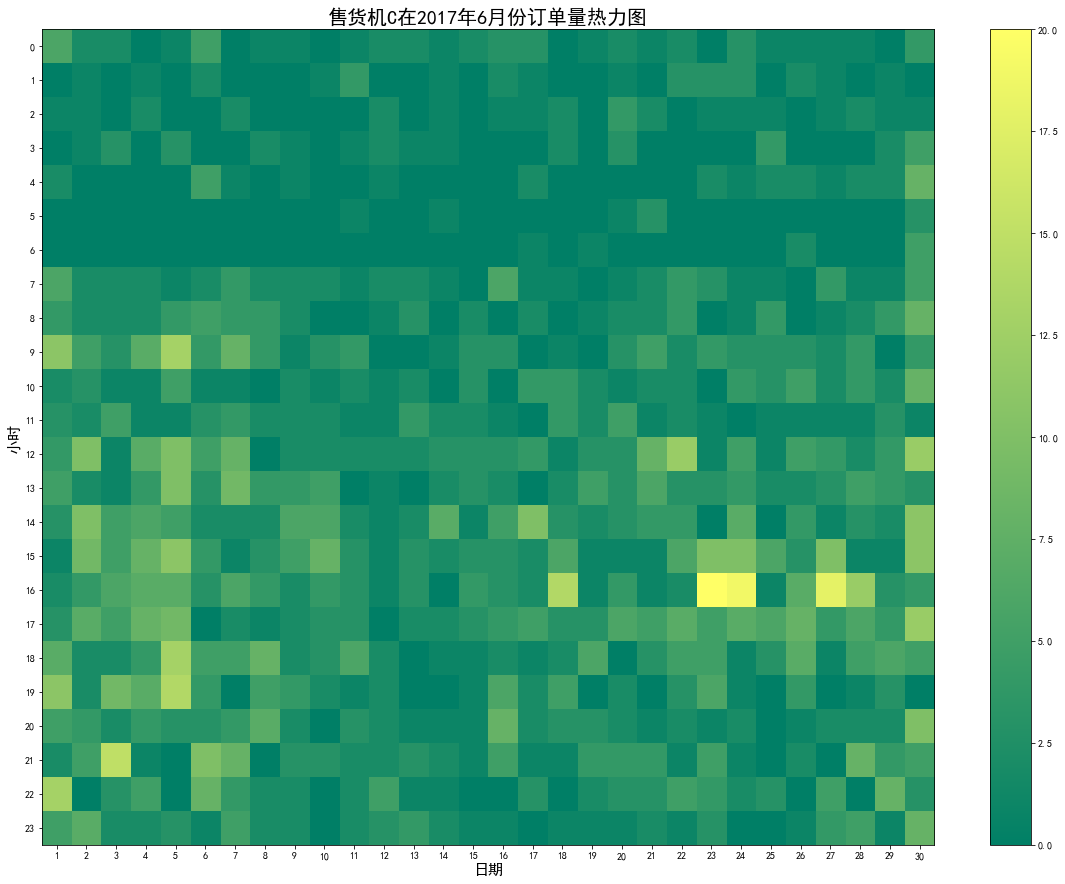

In [66]:
draw_heatmap(heat_data1, x_30, y_24,
             '售货机C在2017年6月份订单量热力图','售货机C在2017年6月份订单量热力图.png')

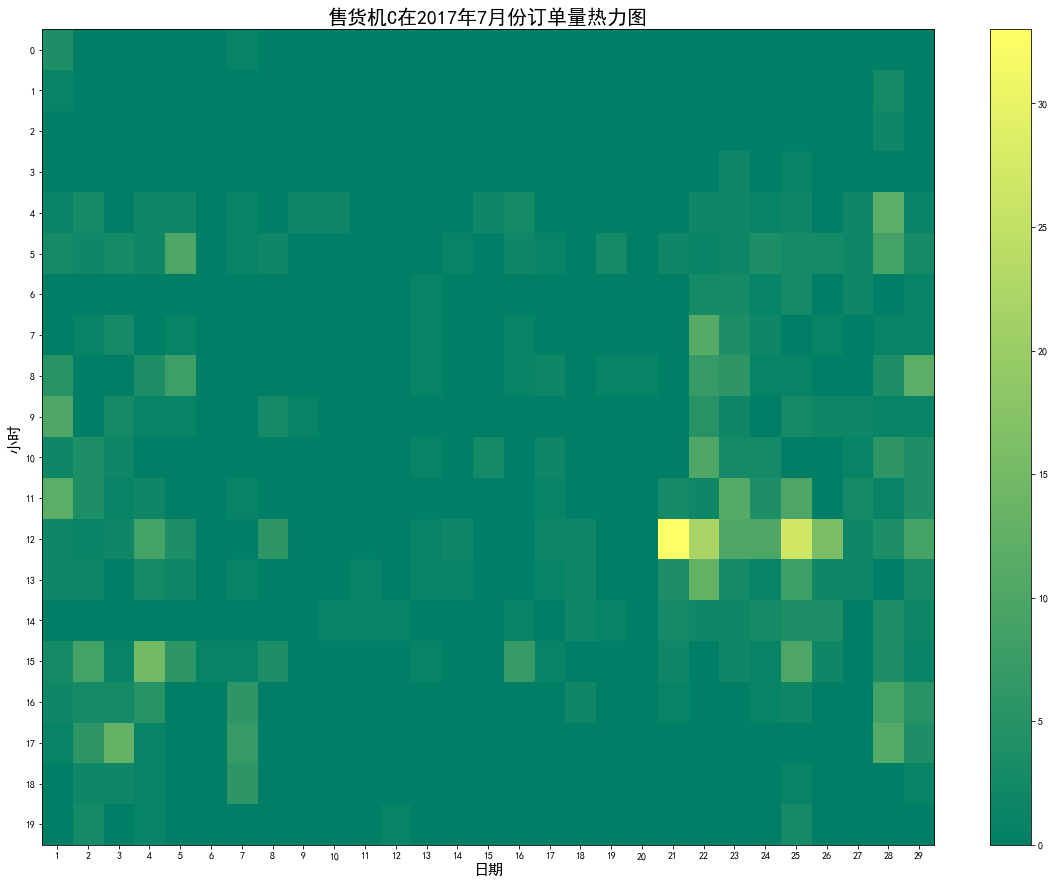

In [67]:
temp_sh = app_merge.loc[((app_merge['month'] == 7) & 
                          (app_merge['地点'] == 'C')), :]
heat_data2 = temp_sh.groupby(['日期', '小时'])['订单号'].count().unstack()
heat_data2 = heat_data2.fillna(0)  
heat_data2 = heat_data2.T          
draw_heatmap(heat_data2, x_30, y_24,
             '售货机C在2017年7月份订单量热力图','售货机C在2017年7月份订单量热力图.png')

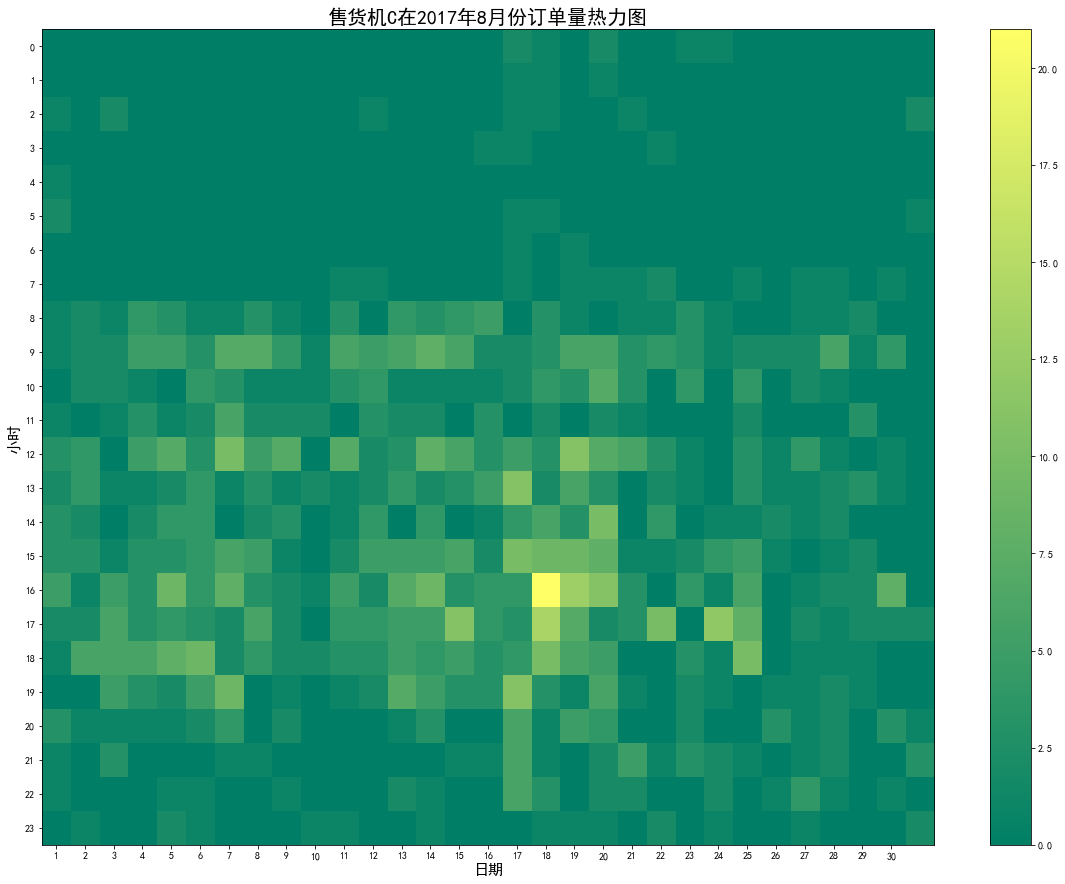

In [68]:
temp_sh = app_merge.loc[((app_merge['month'] == 8) & 
                          (app_merge['地点'] == 'C')), :]
heat_data3 = temp_sh.groupby(['日期', '小时'])['订单号'].count().unstack()
heat_data3 = heat_data3.fillna(0)  
heat_data3 = heat_data3.T          
draw_heatmap(heat_data3, x_30, y_24,
             '售货机C在2017年8月份订单量热力图','售货机C在2017年8月份订单量热力图.png')

In [69]:
app_merge1 = app_merge.iloc[(app_merge['大类']=='饮料').values, :]
retail_A = app_merge1.loc[(app_merge1['地点'] == 'A'), :]
retail_B = app_merge1.loc[(app_merge1['地点'] == 'B'), :]
retail_C = app_merge1.loc[(app_merge1['地点'] == 'C'), :]
retail_D = app_merge1.loc[(app_merge1['地点'] == 'D'), :]
retail_E = app_merge1.loc[(app_merge1['地点'] == 'E'), :]

In [71]:
os.chdir(r'F:\实习报告')
def NoteTags(data,down, up, filename):
    grouped = data.groupby('商品').count()
    grouped['销量占比'] = grouped['订单号'] / len(grouped)
    grouped = grouped.sort_values(by = '销量占比') 
    per_20 = grouped.loc[:, '销量占比'].quantile(down)
    per_80 = grouped.loc[:, '销量占比'].quantile(up)   
    for i in grouped.index:
        if (grouped.loc[i, '销量占比'] < per_20):
            grouped.loc[i, '销量标签'] = '滞销'
        elif (grouped.loc[i, '销量占比'] > per_80):
            grouped.loc[i, '销量标签'] = '热销'
        else:
            grouped.loc[i, '销量标签'] = '正常'
    
    grouped.drop(['订单号','设备ID','应付金额','实际金额','支付时间','地点','状态','提现','大类','二级类','销量占比'],axis=1,inplace=True)
    grouped.to_csv(filename, index = True, encoding = 'gbk')
    return grouped

    
grouped_A = NoteTags(retail_A, 0.20, 0.80, 'task3/task3-1A.csv')
grouped_B = NoteTags(retail_B, 0.20, 0.80, 'task3/task3-1B.csv')
grouped_C = NoteTags(retail_C, 0.20, 0.80, 'task3/task3-1C.csv')
grouped_D = NoteTags(retail_D, 0.20, 0.80, 'task3/task3-1D.csv')
grouped_E = NoteTags(retail_E, 0.20, 0.80, 'task3/task3-1E.csv')


In [103]:
def num_set(data):
    for i in data.index:
        
        if (data.loc[i, '销量标签'] == '滞销' ):
            data.loc[i, 'num'] = 10
        elif (data.loc[i, '销量标签'] == '正常'):
            data.loc[i, 'num'] = 40
        else:
            data.loc[i, 'num'] = 70
num_set(grouped_A)
num_set(grouped_B)
num_set(grouped_C)
num_set(grouped_D)
num_set(grouped_E)


In [104]:
groupby_A = retail_A.groupby('商品').count()
groupby_A

,订单号,设备ID,应付金额,实际金额,支付时间,地点,状态,提现,大类,二级类,month,日期,小时
商品,,,,,,,,,,,,,
100g*5瓶益力多,40,40,40,40,40,40,40,40,40,40,40,40,40
13g雀巢咖啡1+2特浓,4,4,4,4,4,4,4,4,4,4,4,4,4
145ml旺仔牛奶盒装,131,131,131,131,131,131,131,131,131,131,131,131,131
145ml旺仔牛奶罐装,2,2,2,2,2,2,2,2,2,2,2,2,2
150g健能酸奶原味,28,28,28,28,28,28,28,28,28,28,28,28,28
180ml雀巢咖啡罐装,22,22,22,22,22,22,22,22,22,22,22,22,22
205g伊利安慕希原味,53,53,53,53,53,53,53,53,53,53,53,53,53
205ml安慕希蓝莓味,7,7,7,7,7,7,7,7,7,7,7,7,7
250ML东鹏特饮,16,16,16,16,16,16,16,16,16,16,16,16,16


In [105]:
grouped_A

,month,日期,小时,销量标签,num
商品,,,,,
小茗同学冷泡茶（乳酸菌味）,1,1,1,滞销,10.0
脉动（椰子菠萝口味）,1,1,1,滞销,10.0
芦荟汁,1,1,1,滞销,10.0
安慕希酸奶,2,2,2,滞销,10.0
145ml旺仔牛奶罐装,2,2,2,滞销,10.0
娃哈哈红枣酸奶,2,2,2,滞销,10.0
商品1,2,2,2,滞销,10.0
健能酸奶,2,2,2,滞销,10.0
250ml香满楼纯牛奶,2,2,2,滞销,10.0


In [113]:
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def DrawWordCloud(data, background, font, output):
            
    ss = pd.Series(data.loc[:, 'num'], index = data.index)
    
    back_pic = imageio.imread(background)  

    wc = WordCloud( font_path = font,  
                    background_color = "white",  
                    mask = back_pic,    
                    max_font_size = 200,    
                    min_font_size = 10, 
                    random_state = 42
                    )
    
    gar_wordcloud = wc.fit_words(ss)  
    plt.figure(figsize=(16,8))
    plt.imshow(gar_wordcloud)
    plt.axis('off') 
    plt.show() 
    wc.to_file(output) 

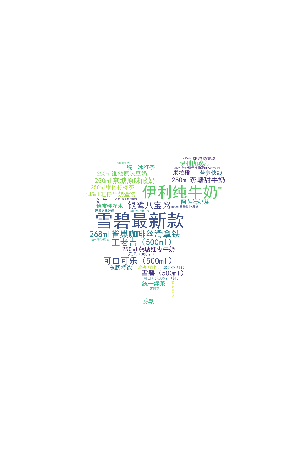

In [114]:
DrawWordCloud(grouped_A, 'result/a.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'result/A售货机画像.png')

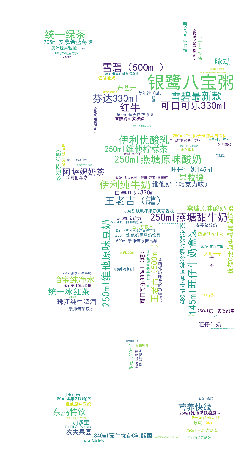

In [115]:

DrawWordCloud(grouped_B, 'result/b.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'result/B售货机画像.png')

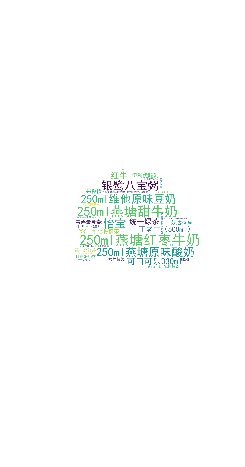

In [116]:
DrawWordCloud(grouped_C, 'result/c.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'result/C售货机画像.png')

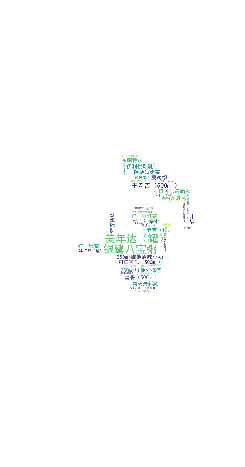

In [117]:
DrawWordCloud(grouped_D,  'result/d.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'result/D售货机画像.png')

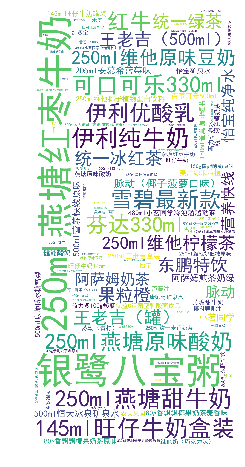

In [118]:
DrawWordCloud(grouped_E, 'result/e.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'result/E售货机画像.png')